In [1]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy.stats as stats
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#configuraciones generales
pd.set_option('display.max_columns', None)

randon_generator = np.random.default_rng(45)

merge_df = True

In [5]:
# Importamos el dataset de train
df_train = pd.read_csv('data/train.csv')
print(df_train.shape)
#Importamos el dataset de test
df_test = pd.read_csv('data/test.csv')
print(df_test.shape)

(103904, 25)
(25976, 25)


In [6]:

# Unimos ambos datasets para separarlos por nuestro lado
if merge_df:
    df_air = pd.concat([df_train, df_test]).sample(frac=1, random_state=randon_generator)
else:
    df_air = df_train


In [31]:
df_air.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
75927,Female,Loyal Customer,25,Business travel,Eco,308,1,4,4,4,1,1,3,1,1,3,3,3,4,1,0,13.0,neutral or dissatisfied
4607,Female,disloyal Customer,39,Business travel,Business,495,3,2,2,4,5,2,5,5,5,2,4,4,5,5,0,0.0,neutral or dissatisfied
70643,Female,Loyal Customer,58,Business travel,Business,292,5,5,5,5,1,3,3,5,5,5,5,4,5,5,0,0.0,satisfied
17867,Male,Loyal Customer,57,Business travel,Eco,694,5,3,3,3,5,5,5,5,3,3,2,4,1,5,0,0.0,satisfied
67702,Female,Loyal Customer,36,Personal Travel,Eco,227,1,5,1,1,1,1,1,1,4,2,5,5,5,1,0,0.0,neutral or dissatisfied


In [16]:
# O podemos utilz
# Borramos la columna Unnamed
df_air.drop(columns=['Unnamed: 0', 'id'], inplace=True)

In [28]:
df_air.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [27]:
df_air.describe(include=['object'])

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65899,106100,89693,62160,73452


In [21]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 75927 to 12396
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    129880

## Podemos realizar una división de los atributos de la siguiente manera:
* Atributos del pasajero

    | Variable | Tipo de dato | Escala de medida |
    | --- | --- | --- |
    | Gender | Cualitativa | Nominal |
    | Customer Type | Cualitativa | Nominal |
    | Age | Cuantitativa Discreta | De razon |
    
* Atributos de Viaje

    ||||
    | --- | --- | --- |
    | Gender | Cualitativa | Nominal |
    | Type of Travel | Cualitativa | Nominal |
    | Class | Cualitativa | Ordinal |
    | Flight Distance | Cuantitativa Discreta  | De razon |

* Atributos de Servicios Relacionados con la Experiencia del Vuelo

    ||||
    | --- | --- | --- |
    | Inflight wifi service  | Cualitativa | Ordinal |
    | Departure/Arrival time convenient | Cualitativa | Ordinal |
    | Ease of Online booking  | Cualitativa | Ordinal |
    | Gate location | Cualitativa | Ordinal |
    | Food and drink | Cualitativa | Ordinal |
    | Online boarding | Cualitativa | Ordinal |
    | Seat comfort | Cualitativa | Ordinal |
    | Inflight entertainment | Cualitativa | Ordinal |
    | On-board service | Cualitativa | Ordinal |
    | Leg room service | Cualitativa | Ordinal |
    | Baggage handling | Cualitativa | Ordinal |
    | Checkin service | Cualitativa | Ordinal |
    | Inflight service | Cualitativa | Ordinal |
    | Cleanliness | Cualitativa | Ordinal |

* Atributos de Rendimiento de vuelo

    ||||
    | --- | --- | --- |
    | Departure Delay in Minutes | Cuantitativa Discreta  | De razon |
    | Arrival Delay in Minutes | Cuantitativa Discreta  | De razon |

* Target

    ||             |         |
    | --- |-------------|---------|
    | satisfaction | Cualitativa | Nominal |
  

#### TARGET
Nuestro objetivo va a ser predecir si el usuario va a estar o no satisfecho con la aerolinea. Para eso, revisamos la distribución del target.

satisfaction
neutral or dissatisfied    0.565537
satisfied                  0.434463
Name: proportion, dtype: float64

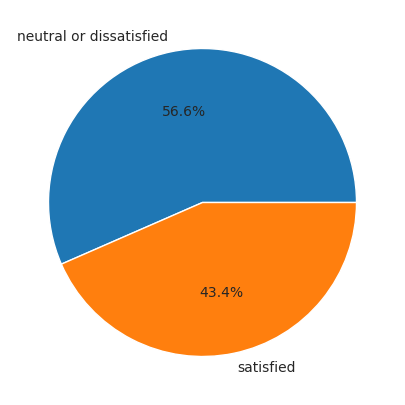

In [131]:
fig = plt.figure(figsize=(10, 5))
plt.pie(df_air.satisfaction.value_counts(), labels=df_air.satisfaction.unique(), autopct='%1.1f%%')

#### FEATURES

PASAJERO

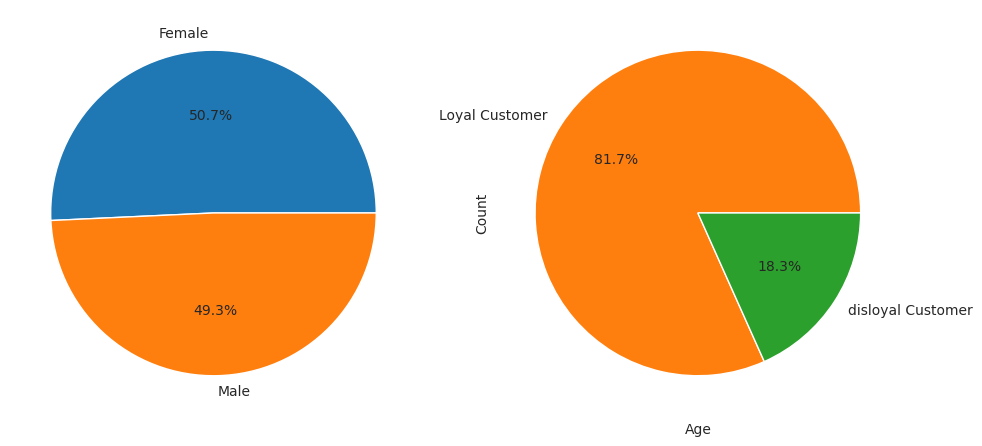

In [81]:
fig1, (ax1, ax2) = plt.subplots(1, 2 , figsize=(10, 5))
ax1.pie(df_air.Gender.value_counts(), labels=df_air.Gender.unique(), autopct='%1.1f%%')
# sns.pie(data=df_air.Gender, ax=ax1)

ax2.pie(df_air['Customer Type'].value_counts(), labels=df_air['Customer Type'].unique(), autopct='%1.1f%%')
# sns.pie(data=df_air['Customer Type'], ax=ax3)
plt.tight_layout()
plt.show()



array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
       58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
       75, 76, 77, 78, 79, 80, 85])

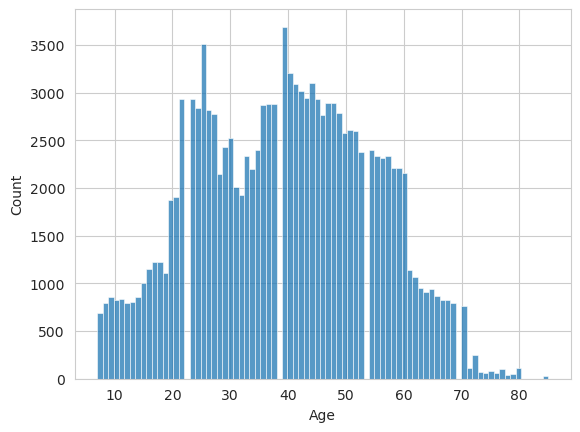

In [104]:
sns.histplot(data=df_air.Age)
np.sort(df_air.Age.unique())

<Axes: xlabel='Age', ylabel='Count'>

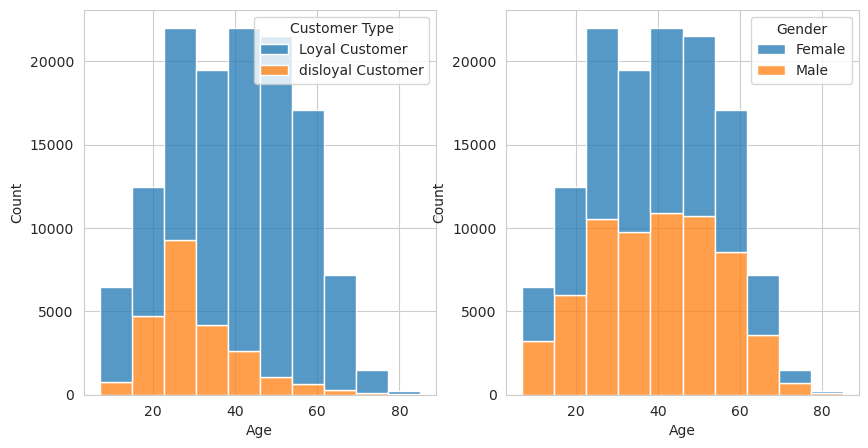

In [99]:
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(data=df_air, x='Age', bins=10, hue='Customer Type', multiple='stack', ax=ax1)
sns.histplot(data=df_air, x='Age', bins=10, hue='Gender', multiple='stack', ax=ax2)


In [117]:
def clasificar_etapa_vida(edad):
    if edad < 13:
        return 'Infancia'
    elif edad < 18:
        return 'Adolescencia'
    elif edad < 25:
        return 'Jóvenes adultos'
    elif edad < 35:
        return 'Adultos jóvenes'
    elif edad < 45:
        return 'Adultos medios'
    elif edad < 55:
        return 'Adultos mayores'
    elif edad < 65:
        return 'Prejubilación'
    else:
        return 'Jubilación y tercera edad'
df_air['Age Stage'] = df_air['Age'].apply(clasificar_etapa_vida)
etapas_orden = ['Infancia', 'Adolescencia', 'Jóvenes adultos', 'Adultos jóvenes', 
                'Adultos medios', 'Adultos mayores', 'Prejubilación', 
                'Jubilación y tercera edad']
df_air['Age Stage']=pd.Categorical(df_air['Age Stage'], categories=etapas_orden, ordered=True)

<Axes: xlabel='Age Stage', ylabel='Count'>

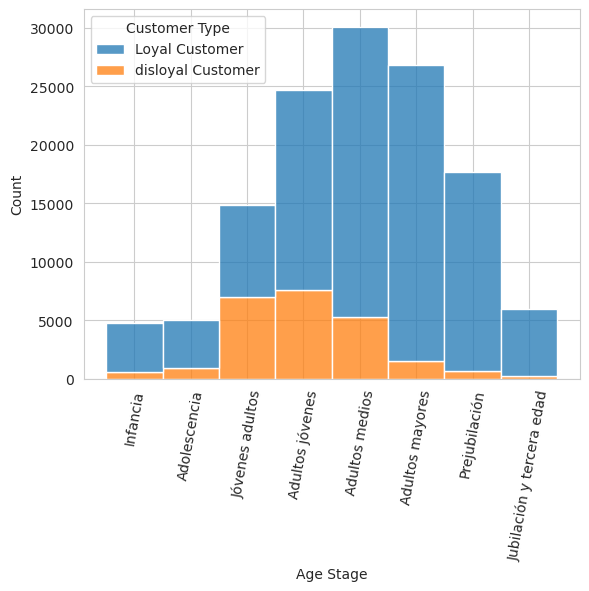

In [123]:
plt.xticks(rotation=80)
sns.histplot(data=df_air, x='Age Stage', hue='Customer Type', multiple='stack')





In [136]:
df_air[df_air['Inflight entertainment']== 0 ]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age Stage
67666,Male,Loyal Customer,26,Business travel,Eco,999,0,2,3,2,0,1,3,0,4,4,4,2,3,0,0,0.0,neutral or dissatisfied,Adultos jóvenes
25512,Male,Loyal Customer,23,Business travel,Eco Plus,1407,0,5,5,5,0,1,4,0,2,1,4,1,3,0,28,26.0,neutral or dissatisfied,Jóvenes adultos
21706,Male,Loyal Customer,24,Business travel,Eco Plus,612,0,1,4,4,0,1,4,0,3,5,4,1,3,0,0,0.0,neutral or dissatisfied,Jóvenes adultos
16475,Male,Loyal Customer,43,Business travel,Business,3098,2,3,3,3,1,2,2,0,0,1,2,2,0,1,3,0.0,neutral or dissatisfied,Adultos medios
88714,Female,Loyal Customer,53,Business travel,Business,184,2,3,3,3,2,3,3,0,0,1,2,3,0,4,0,0.0,neutral or dissatisfied,Adultos mayores
84321,Male,Loyal Customer,21,Business travel,Eco,689,0,1,1,1,0,1,2,0,2,5,3,2,3,0,0,0.0,neutral or dissatisfied,Jóvenes adultos
53059,Female,Loyal Customer,24,Business travel,Business,3156,3,3,5,3,0,1,3,0,2,4,3,4,4,0,40,30.0,neutral or dissatisfied,Jóvenes adultos
4667,Female,Loyal Customer,66,Business travel,Business,3969,3,4,4,4,1,3,3,0,0,1,3,3,0,2,0,0.0,neutral or dissatisfied,Jubilación y tercera edad
60740,Male,Loyal Customer,23,Business travel,Eco Plus,1984,0,1,1,1,0,1,2,0,1,4,4,4,3,0,0,0.0,neutral or dissatisfied,Jóvenes adultos
466,Female,Loyal Customer,49,Business travel,Business,1600,2,5,5,5,4,4,4,0,0,1,2,2,0,3,0,0.0,neutral or dissatisfied,Adultos mayores
